In [ ]:
# Imports
library(SingleR)
library(Seurat)
library(ggplot2)
library(ggrepel)
library(gridExtra)
library(grid)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.4.2"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, 

In [3]:
# Change working directory
setwd("../../Data/R Objects/Integrated R Objects")

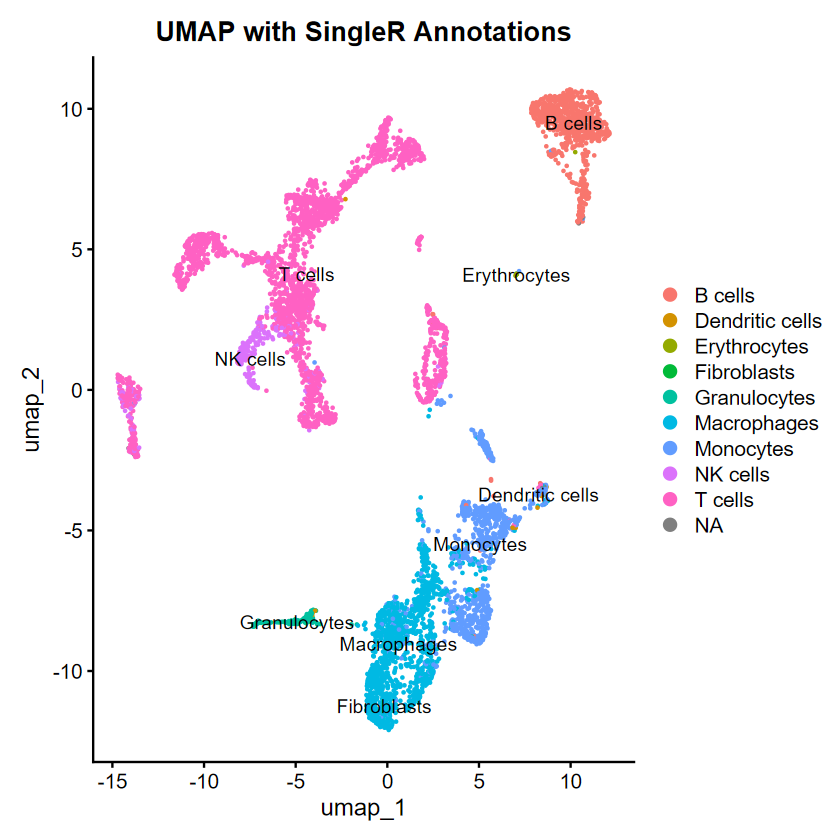

In [ ]:
# Get SingleR annotation for mice
data_m <- readRDS("all_mice_integrated.rds")

# Get reference atlas from CellDex
MouseRNAseqData <- celldex::MouseRNAseqData()

# Convert to SCE to use SingleR
data.sce <- as.SingleCellExperiment(data_m)

# Predict cell types
pred.MouseRNAseqData <- SingleR(test = data.sce, ref = MouseRNAseqData, assay.type.test=1,
    labels = MouseRNAseqData$label.main)

# View annotations
cluster_table <- cbind(table(pred.MouseRNAseqData$pruned.labels,data.sce$seurat_clusters))
cluster_table

# Add SingleR predicted labels to Seurat metadata
data_m$SingleR_Labels <- pred.MouseRNAseqData$pruned.labels

# UMAP plot with SingleR labels
DimPlot(data_m, reduction = "umap", group.by = "SingleR_Labels", label = TRUE) + 
    ggtitle("UMAP with SingleR Annotations")

,0,1,2,3,4,5,6,7,8,9,⋯,25,26,27,28,29,30,31,32,33,34
Adipocytes,0,3,9,1,0,9,3,0,1,0,⋯,0,18,3,88,23,0,2,1,0,1
Astrocytes,3,8,6,0,1,0,5,0,1,0,⋯,0,10,0,126,5,0,0,0,0,0
B-cells,0,1,0,0,0,0,0,0,0,0,⋯,0,979,29,0,1408,1,1,1,1,0
CD4+ T-cells,10,1929,1441,8,2607,4046,169,0,0,0,⋯,0,7,491,0,26,430,3,0,0,27
CD8+ T-cells,7965,5195,4125,4823,2322,700,4385,0,103,0,⋯,0,52,1072,1,102,831,5,12,0,193
Chondrocytes,9,3,5,1,0,0,0,0,0,0,⋯,0,6,6,105,13,2,0,0,0,1
DC,0,0,0,0,0,1,0,0,0,0,⋯,0,13,0,0,1,0,0,97,70,0
Endothelial cells,0,0,2,0,0,4,0,0,0,0,⋯,0,0,3,0,3,0,1,0,0,0
Eosinophils,1,7,0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,7,0,0,0
Erythrocytes,0,0,0,0,0,0,0,0,0,0,⋯,0,10,1,0,0,0,14,0,0,0


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



ERROR: Error: object 'single_r_plot' not found


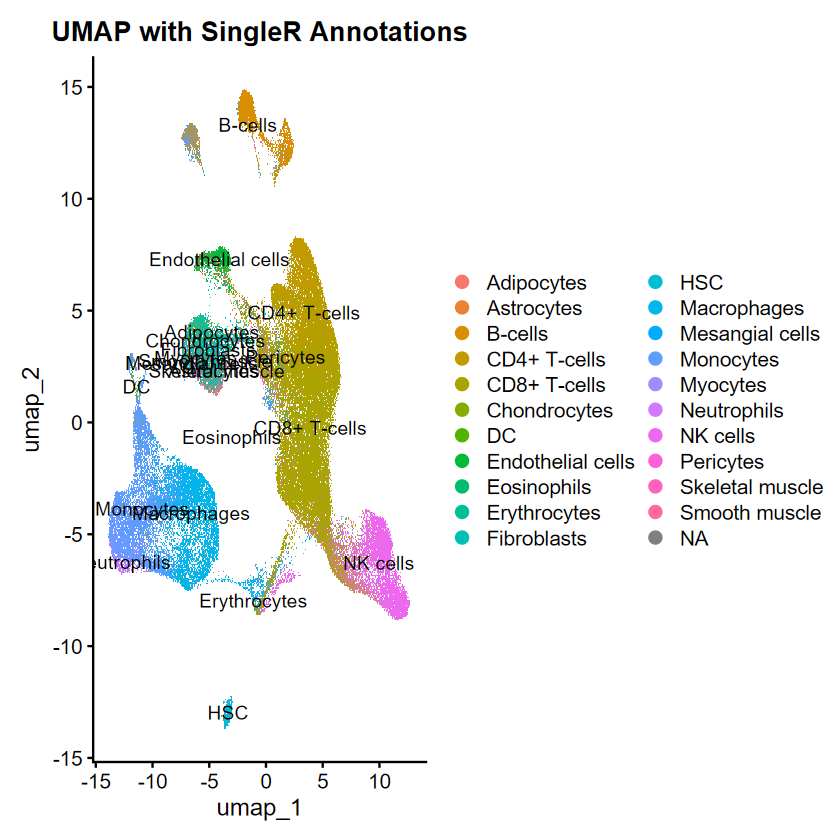

In [ ]:
# Get SingleR annotation for humans
data_h <- readRDS("integrated_all_humans.rds")

# Get reference atlas from CellDex
hpca.se <- celldex::BlueprintEncodeData()

# Convert to SCE to use SingleR
data.sce <- as.SingleCellExperiment(data_h)

# Predict
pred.hpca <- SingleR(test = data.sce, ref = hpca.se, assay.type.test=1,
    labels = hpca.se$label.main)

# View annotations
cluster_table <- cbind(table(pred.hpca$pruned.labels, data.sce$seurat_clusters))
cluster_table

# Add SingleR predicted labels to Seurat metadata
data_h$SingleR_Labels <- pred.hpca$pruned.labels

# UMAP plot with SingleR labels
DimPlot(data_h, reduction = "umap", group.by = "SingleR_Labels", label = TRUE) + 
    ggtitle("UMAP with SingleR Annotations")

single_r_plot

In [ ]:
# Change NA labels to not annotated for both UMAPs
data_m$SingleR_Labels[is.na(data_m$SingleR_Labels)] <- "Not annotated"
data_h$SingleR_Labels[is.na(data_h$SingleR_Labels)] <- "Not annotated"
data_h$SingleR_Labels[data_h$SingleR_Labels == "DC"] <- "Dendritic cells"
data_h$SingleR_Labels[data_h$SingleR_Labels == "Endothelial cells"] <- "ECs"

In [145]:
# Change setting for visualizing plots within VSCODE
options(repr.plot.width=24, repr.plot.height=20)


# Mouse UMAP
single_r_mouse <- DimPlot(data_m, reduction = "umap", group.by = "SingleR_Labels", label = TRUE, label.size = 13, repel = T) + 
    ggtitle("UMAP with SingleR Annotations") + 
    theme(plot.title = element_blank(), axis.title.x = element_text(size=36), axis.title.y = element_text(size=36), legend.position = c(0.03, 0.9), legend.text = element_text(size = 32), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2))

# Human UMAP
single_r_plot_humans <- DimPlot(data_h, reduction = "umap", group.by = "SingleR_Labels", label = TRUE, label.size = 13, repel = T) + 
    ggtitle("UMAP with SingleR Annotations") + 
    theme(plot.title = element_blank(), axis.title.x = element_text(size=36), axis.title.y = element_text(size=36), legend.position = c(0.55, 0.85), legend.text = element_text(size = 32), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



Warning message:
"ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


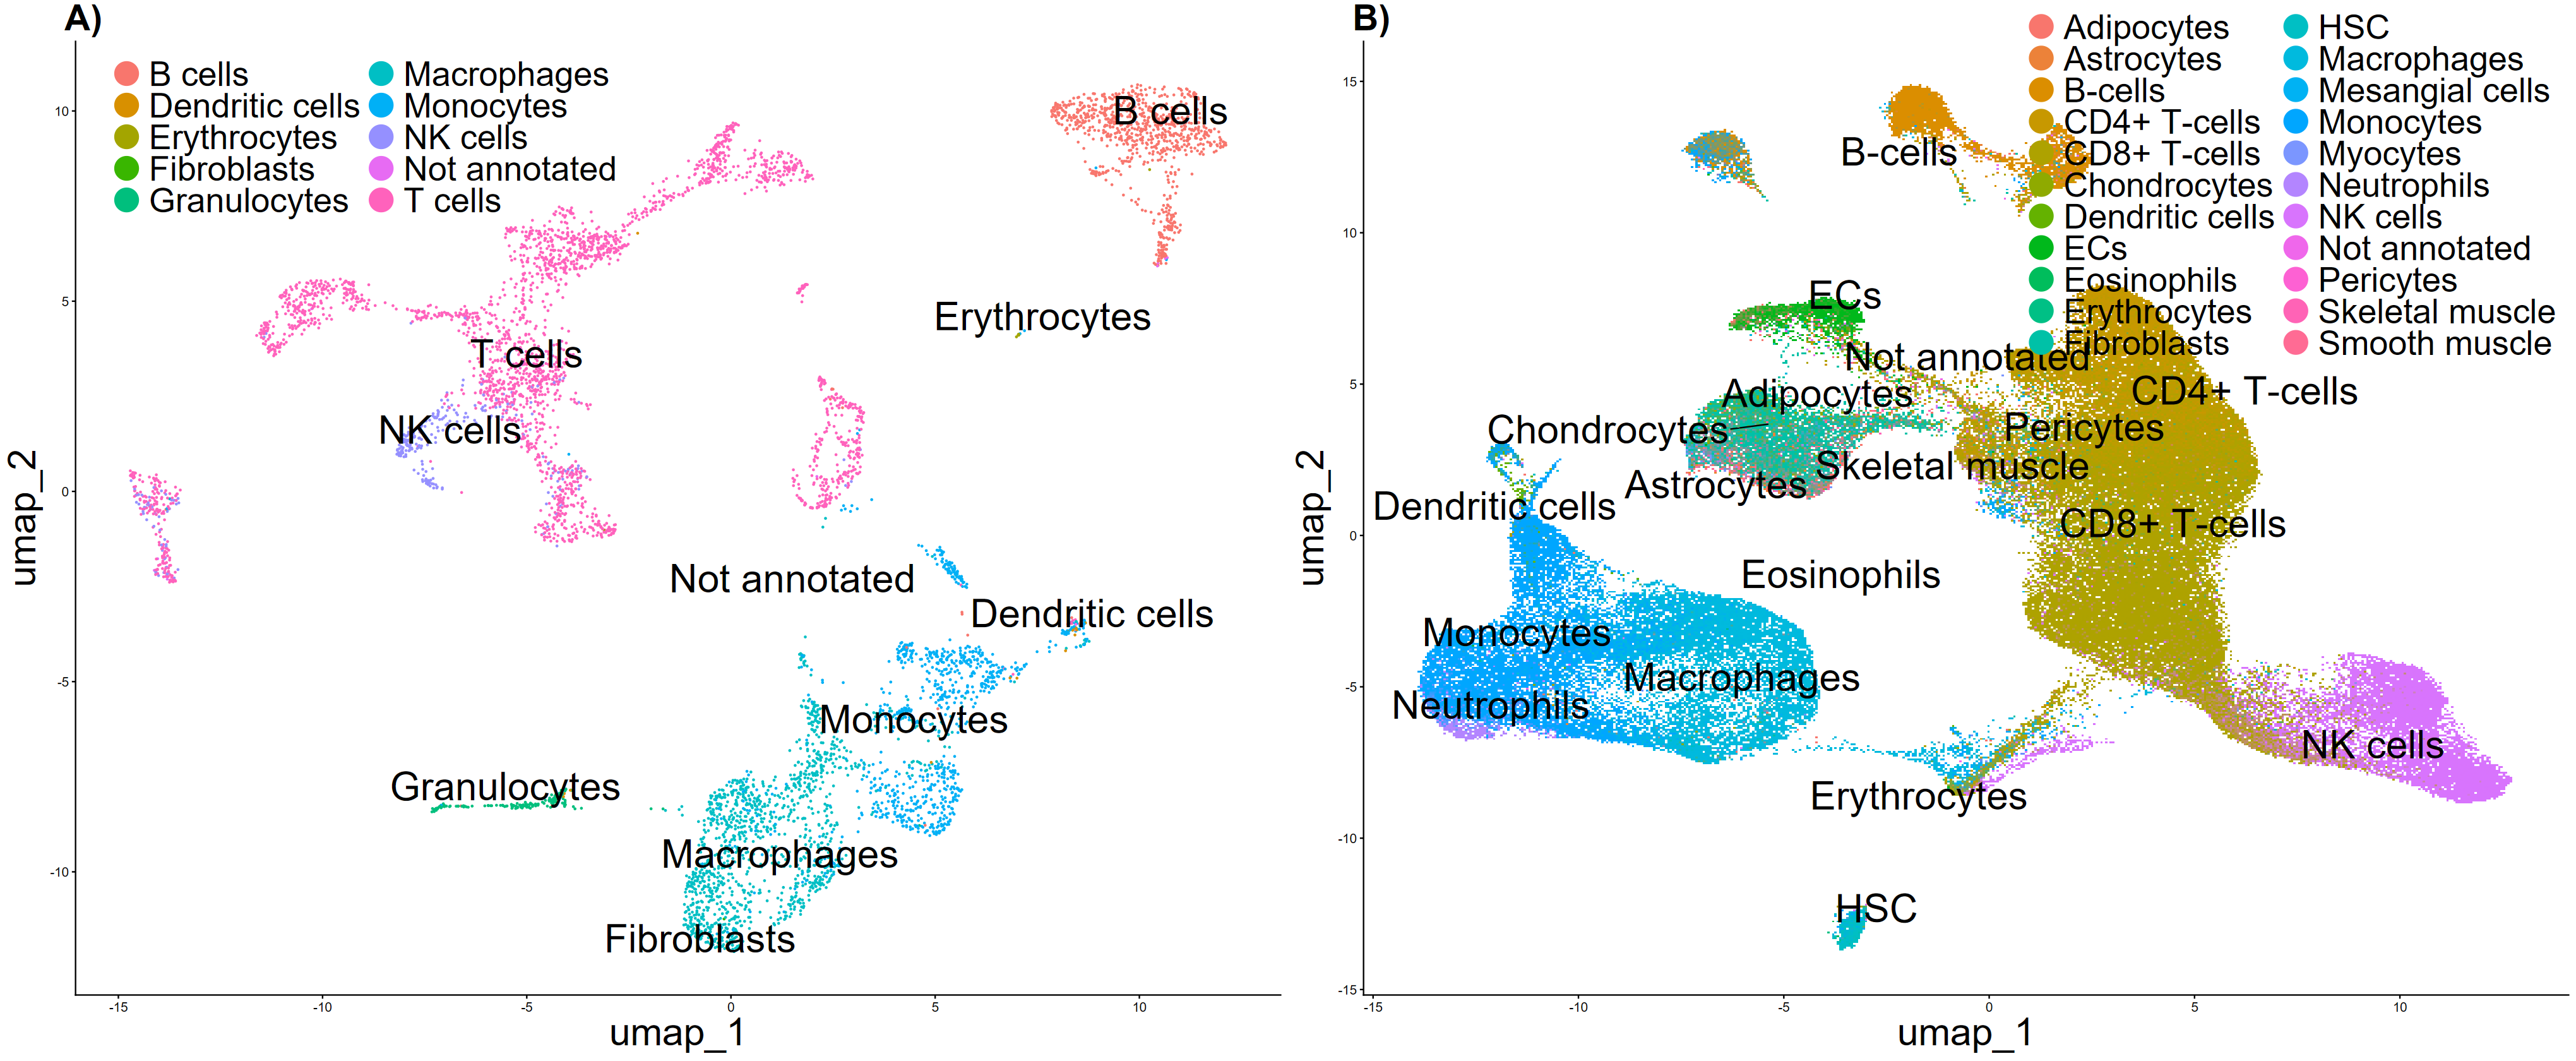

In [ ]:
# Change setting for visualizing plots within VSCODE
options(repr.plot.width=34, repr.plot.height=14)

# Define the layout matrix
layout_matrix <- rbind(
  c(1, 2)
)

# Create labeled plots
single_r_mouse_plot <- arrangeGrob(single_r_mouse, 
                               top = textGrob("A)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

single_r_humans <- arrangeGrob(single_r_plot_humans, 
                                  top = textGrob("B)", x = unit(0.05, "npc"), just = "left", 
                                                 gp = gpar(fontsize = 34, fontface = "bold")))                                        

# Arrange the plots with labels
grid.arrange(
  single_r_mouse_plot, single_r_humans,
  layout_matrix = layout_matrix
)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



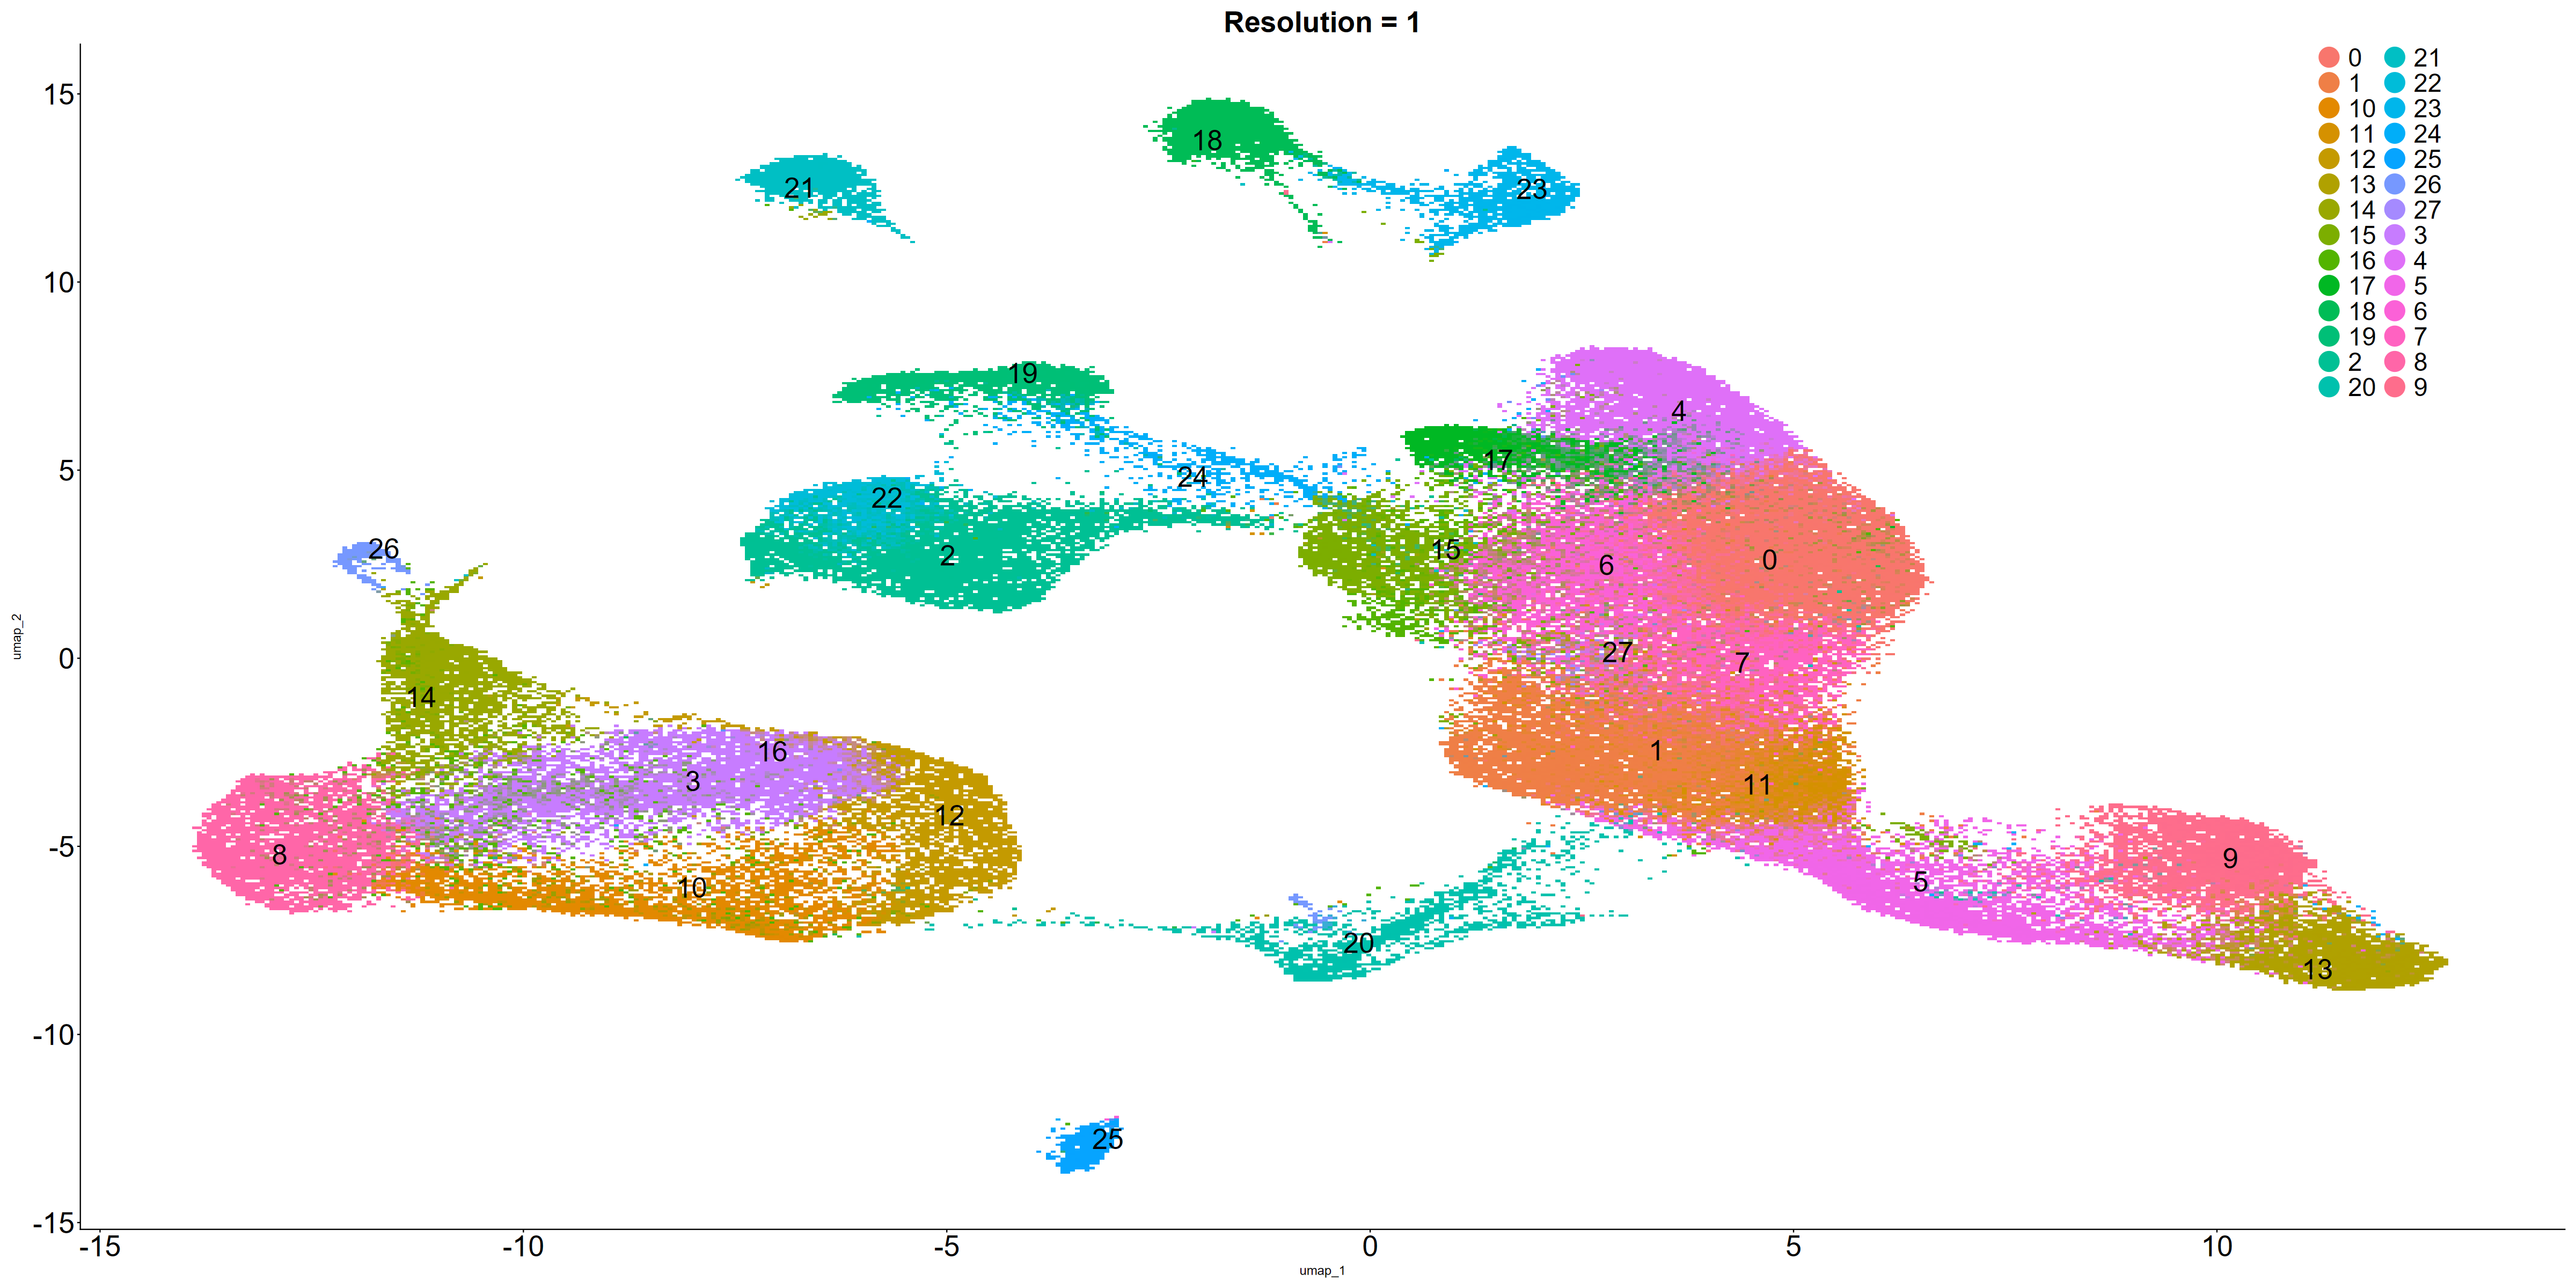

In [ ]:
# Create resolution plot of res = 1 for human data (all immune cells)
res_3 <- DimPlot(data_h, reduction = "umap", group.by = "RNA_snn_res.1", label = T, label.size = 11, repel = T) + 
    theme(plot.title = element_text(size=32), axis.text.x = element_text(size=32), axis.text.y = element_text(size=32), legend.position = c(0.9, 0.85), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2)) + ggtitle("Resolution = 1")

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=40, repr.plot.height=20)

res_3

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


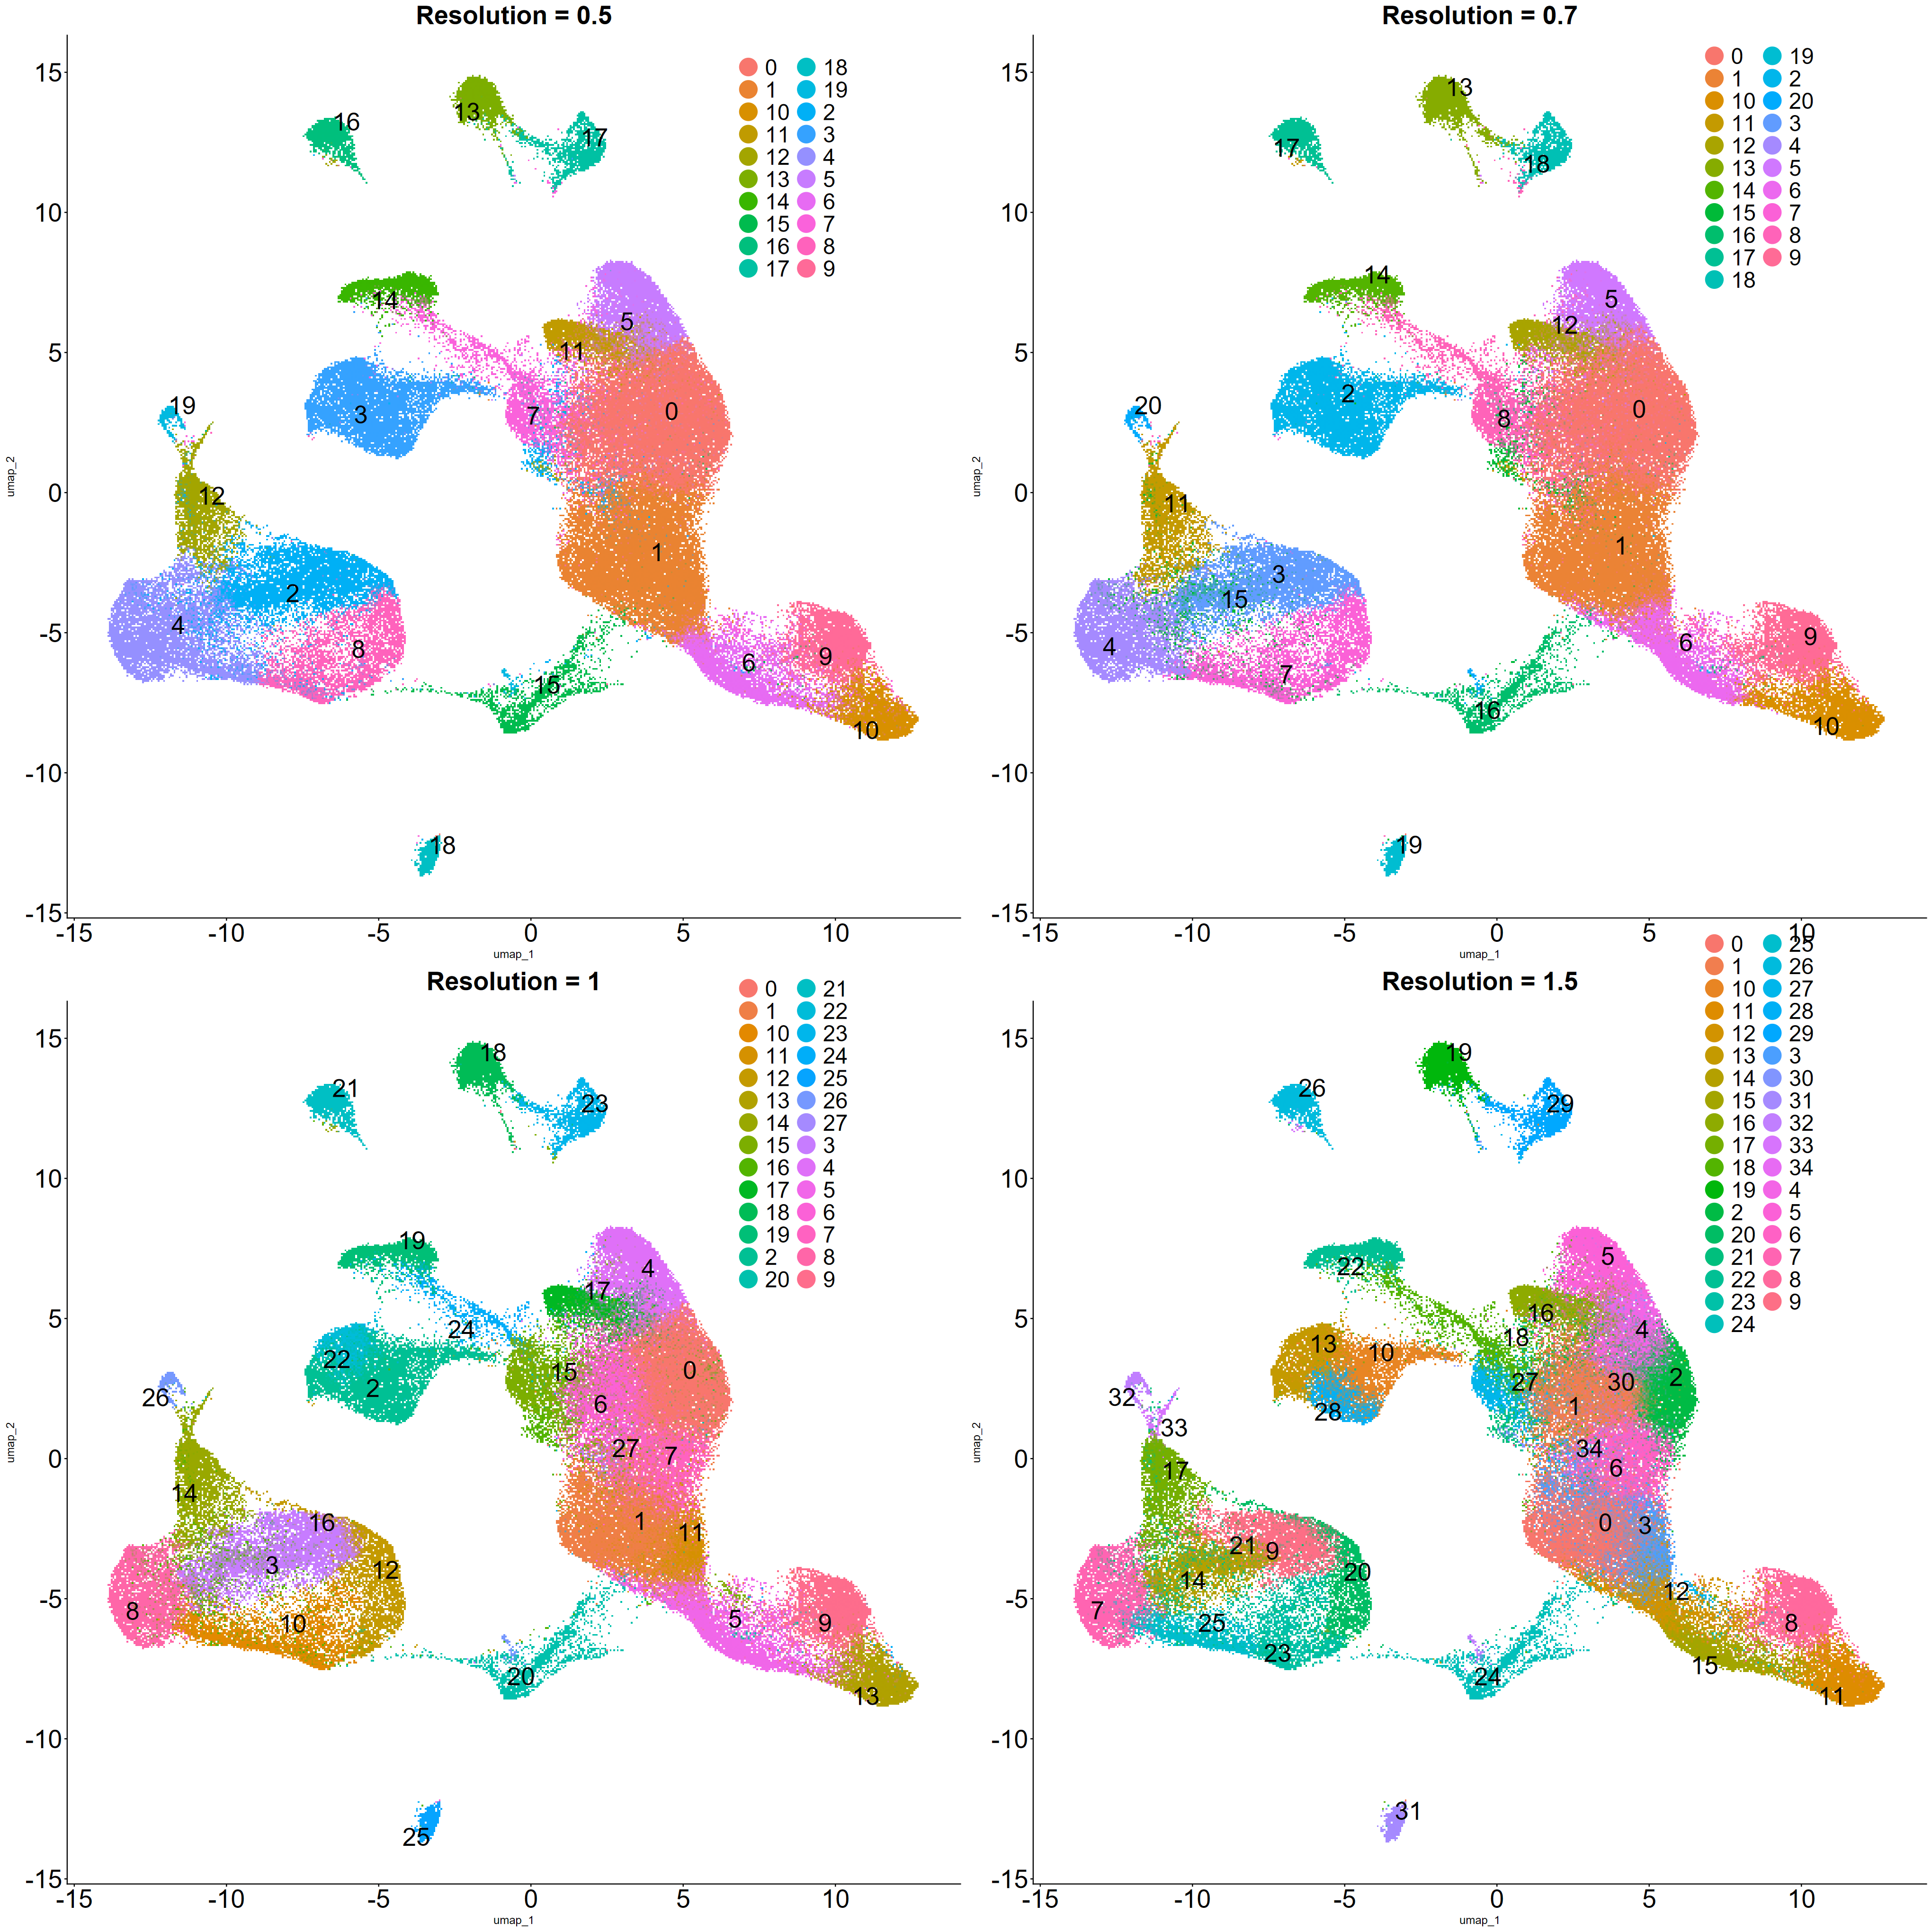

In [163]:
# Change setting for visualizing plots within VSCODE
options(repr.plot.width=34, repr.plot.height=34)

# Get DimPlots of different resolutions
res_1 <- DimPlot(data_h, reduction = "umap", group.by = "RNA_snn_res.0.5", label = T, label.size = 11, repel = T) + 
    theme(plot.title = element_text(size=32), axis.text.x = element_text(size=32), axis.text.y = element_text(size=32), legend.position = c(0.75, 0.85), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2)) + ggtitle("Resolution = 0.5")
res_2 <- DimPlot(data_h, reduction = "umap", group.by = "RNA_snn_res.0.7", label = T, label.size = 11, repel = T) + 
    theme(plot.title = element_text(size=32), axis.text.x = element_text(size=32), axis.text.y = element_text(size=32), legend.position = c(0.75, 0.85), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2)) + ggtitle("Resolution = 0.7")
res_3 <- DimPlot(data_h, reduction = "umap", group.by = "RNA_snn_res.1", label = T, label.size = 11, repel = T) + 
    theme(plot.title = element_text(size=32), axis.text.x = element_text(size=32), axis.text.y = element_text(size=32), legend.position = c(0.75, 0.85), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2)) + ggtitle("Resolution = 1")
res_4 <- DimPlot(data_h, reduction = "umap", group.by = "RNA_snn_res.1.5", label = T, label.size = 11, repel = T) + 
    theme(plot.title = element_text(size=32), axis.text.x = element_text(size=32), axis.text.y = element_text(size=32), legend.position = c(0.75, 0.85), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2)) + ggtitle("Resolution = 1.5")

# Plot
grid.arrange(res_1, res_2, res_3, res_4, ncol=2)